Show the predicted closing stock values of INFOSYS in 2024 on 10 JAN, 10 JUN, 30 AUG, 01 OCT using RNN ,LSTM, Birectional LSTM. Plot these curves on the same graph and also plot the actual(time value). Also complete % error for each


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
from keras.layers import Dropout
import yfinance as yf

# Step 1: Load the data
# Download Infosys data for the past 5 years using yahoofinance
ticker = 'INFY.NS'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
data = data['Close']  

# Step 2: Preprocessing the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))


def create_dataset(dataset, time_step=100):
    X_data, Y_data = [], []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)


time_step = 100
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training (80%) and testing (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]



# Model 1: Simple RNN
def build_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model 2: LSTM
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model 3: Bidirectional LSTM
def build_bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and predict for each model
def train_and_predict(model, X_train, Y_train, X_test):
    # Train the model
    model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose=1)
    
    # Predict future prices (1 month, 6 months, 1 year)
    future_steps = [22, 132, 252]  # Approx. trading days in 1 month, 6 months, and 1 year
    
    predictions = []
    for step in future_steps:

        last_data = X_test[-1]
        future_pred = []
        for _ in range(step):
            pred = model.predict(last_data.reshape(1, time_step, 1))
            future_pred.append(pred[0, 0])
            last_data = np.append(last_data[1:], pred)
        
        # Scale back the predictions to original values
        future_pred = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))
        predictions.append(future_pred[-1, 0])
    
    return predictions


rnn_model = build_rnn()
lstm_model = build_lstm()
bidirectional_lstm_model = build_bidirectional_lstm()

# Train and predict with each model
rnn_predictions = train_and_predict(rnn_model, X_train, Y_train, X_test)
lstm_predictions = train_and_predict(lstm_model, X_train, Y_train, X_test)
bidirectional_lstm_predictions = train_and_predict(bidirectional_lstm_model, X_train, Y_train, X_test)

# Step 4: Print the results
print("RNN Predictions (1 month, 6 months, 1 year):", rnn_predictions)
print("LSTM Predictions (1 month, 6 months, 1 year):", lstm_predictions)
print("Bidirectional LSTM Predictions (1 month, 6 months, 1 year):", bidirectional_lstm_predictions)

[*********************100%***********************]  1 of 1 completed
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1481
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0504
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0362
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0246
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0191
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0136
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0122
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0078
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0094
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0096
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0088
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0075
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0062
Epoc

In [8]:
# Step 1: Prepare the Data for Plotting
# Get the actual prices for the last 252 trading days (approximately 1 year)
actual_prices = data[-252:].values
dates = data.index[-252:]  # Corresponding dates

# Create an extended array for plotting
future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=252, freq='B')  # Business days
rnn_future = np.array([actual_prices[-1]] + rnn_predictions)  # Start with the last actual price
lstm_future = np.array([actual_prices[-1]] + lstm_predictions)
bidirectional_lstm_future = np.array([actual_prices[-1]] + bidirectional_lstm_predictions)

# Prepare the full prediction array
rnn_full = np.concatenate((actual_prices, rnn_future[1:]))
lstm_full = np.concatenate((actual_prices, lstm_future[1:]))
bidirectional_lstm_full = np.concatenate((actual_prices, bidirectional_lstm_future[1:]))

# Step 2: Calculate Percentage Errors
def calculate_percentage_error(actual, predicted):
    return np.abs((actual - predicted) / actual) * 100

# Assuming the predictions are for the next month, 6 months, and 1 year
actual_future = actual_prices[-1]  # Last actual price as starting point for predictions

rnn_errors = calculate_percentage_error([actual_future] * 3, rnn_predictions)
lstm_errors = calculate_percentage_error([actual_future] * 3, lstm_predictions)
bidirectional_lstm_errors = calculate_percentage_error([actual_future] * 3, bidirectional_lstm_predictions)

print("RNN Percentage Errors:", rnn_errors)
print("LSTM Percentage Errors:", lstm_errors)
print("Bidirectional LSTM Percentage Errors:", bidirectional_lstm_errors)

# Step 3: Plot the Results
plt.figure(figsize=(14, 7))
plt.plot(dates, actual_prices, label='Actual Prices', color='blue')
plt.plot(future_dates, rnn_future[1:], label='RNN Predictions', color='red')
plt.plot(future_dates, lstm_future[1:], label='LSTM Predictions', color='green')
plt.plot(future_dates, bidirectional_lstm_future[1:], label='Bidirectional LSTM Predictions', color='orange')

plt.title('Stock Price Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

[*********************100%***********************]  1 of 1 completed
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2826
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0486
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0355
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0281
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0241
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0221
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0194
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0154
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0115
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0125
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0113
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0088
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0064
Epoc

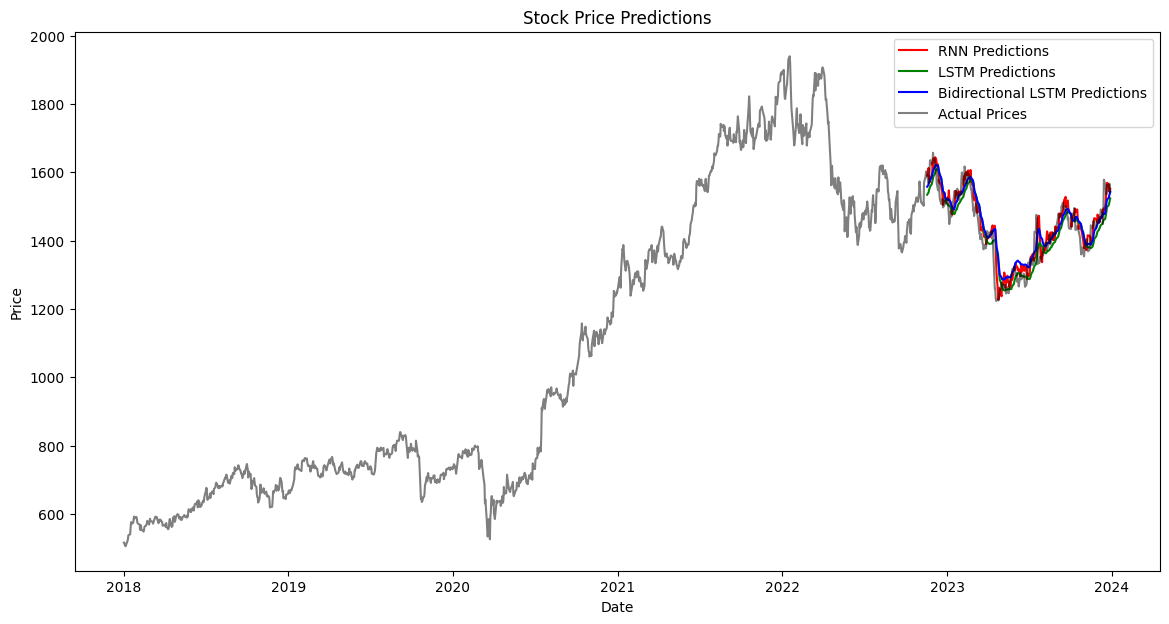

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
from keras.layers import Dropout
import yfinance as yf

# Step 1: Load the data
ticker = 'INFY.NS'
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')
data = data['Close']  

# Step 2: Preprocessing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

def create_dataset(dataset, time_step=100):
    X_data, Y_data = [], []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

time_step = 100
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training (80%) and testing (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Model definitions...
# (keep your model-building functions unchanged)

# Train and predict for each model
def train_and_predict(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose=1)
    
    # Predict on the test set
    test_predictions = model.predict(X_test)
    
    # Scale back the predictions to original values
    test_predictions = scaler.inverse_transform(test_predictions)
    
    return test_predictions.flatten()

# Train and predict with each model
rnn_model = build_rnn()
lstm_model = build_lstm()
bidirectional_lstm_model = build_bidirectional_lstm()

rnn_predictions = train_and_predict(rnn_model, X_train, Y_train, X_test)
lstm_predictions = train_and_predict(lstm_model, X_train, Y_train, X_test)
bidirectional_lstm_predictions = train_and_predict(bidirectional_lstm_model, X_train, Y_train, X_test)

# Step 4: Print the results
print("RNN Predictions :", rnn_predictions)
print("LSTM Predictions :", lstm_predictions)
print("Bidirectional LSTM Predictions :", bidirectional_lstm_predictions)

# Step 5: Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + time_step + 1:], rnn_predictions, label='RNN Predictions', color='red')
plt.plot(data.index[train_size + time_step + 1:], lstm_predictions, label='LSTM Predictions', color='green')
plt.plot(data.index[train_size + time_step + 1:], bidirectional_lstm_predictions, label='Bidirectional LSTM Predictions', color='blue')
plt.plot(data.index, data.values, label='Actual Prices', color='black', alpha=0.5)
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()